# 1. Perkenalan

Nama: Mustika Tri Utami

Objective : Dataset yang digunakan berisi informasi mengenai data mahasiswa. Project ini dibuat dengan tujuan untuk memprediksi apakah mahasiswa akan lulus, masih kuliah, atau dropout yang dapat digunakan oleh pihak kemahasiswaan untuk mengatur program untuk mengurangi jumlah mahasiswa dropout. True merupakan kondisi dropout, False graduate dan enrolled. Maka FN yaitu diprediksi akan lulus atau enrolled tapi ternyata dropout. Kondisi ini lebih rawan dan ingin dikurangi sebanyak mungkin. Oleh karena itu, akan menggunakan Recall.

# 2. Import Libraries

In [99]:
!pip install feature_engine

In [100]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from feature_engine.outliers import Winsorizer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import recall_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import json
import pickle

# 3. Data Loading

In [101]:
# Data loading

df = pd.read_csv('dataset.csv')

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [102]:
# Menampilkan informasi dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [103]:
# Memanggil nama kolom

df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [104]:
# Mengubah nama kolom agar mudah digunakan di proses selanjutnya

df.columns = ['marital_status',
              'application_mode',
              'application_order',
              'course', 'daytime',
              'prev_qualification',
              'nationality',
              'mother_qualification',
              'father_qualification',
              'mother_occupation',
              'father_occupation',
              'displaced',
              'special_needs',
              'debtor',
              'tuition_fee',
              'gender',
              'scholarship',
              'age',
              'international',
              'sem1_credited',
              'sem1_enrolled',
              'sem1_eval',
              'sem1_approved',
              'sem1_grade',
              'sem1_wo_eval',
              'sem2_credited',
              'sem2_enrolled',
              'sem2_eval',
              'sem2_approved',
              'sem2_grade',
              'sem2_wo_eval',
              'unemployment_rate',
              'inflation_rate',
              'gdp',
              'target']

In [105]:
# Cek statistik data

df.describe()

,marital_status,application_mode,application_order,course,daytime,prev_qualification,nationality,mother_qualification,father_qualification,mother_occupation,...,sem1_wo_eval,sem2_credited,sem2_enrolled,sem2_eval,sem2_approved,sem2_grade,sem2_wo_eval,unemployment_rate,inflation_rate,gdp
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [106]:
# Cek data duplikat

df[df.duplicated()]

,marital_status,application_mode,application_order,course,daytime,prev_qualification,nationality,mother_qualification,father_qualification,mother_occupation,...,sem2_credited,sem2_enrolled,sem2_eval,sem2_approved,sem2_grade,sem2_wo_eval,unemployment_rate,inflation_rate,gdp,target


# 4. Exploratory Data Analysis (EDA)

## a. Distribusi target

<Axes: title={'center': 'Distribusi Status Mahasiswa'}, xlabel='target'>

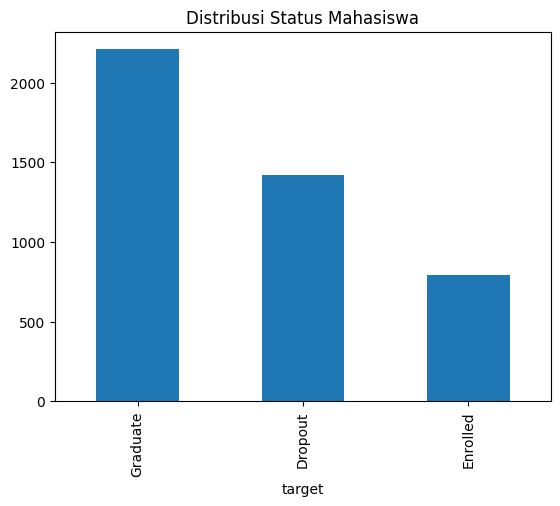

In [107]:
# Cek distribusi status mahasiswa

df['target'].value_counts().plot(kind='bar', title='Distribusi Status Mahasiswa')

Dari diagram terlihat bahwa mayoritas mahasiswa lulus. Namun droptout memiliki jumlah yang lebih banyak daripada mahasiswa yang masih kuliah tersebut.
Hal ini dapat menjadi perhatian bagian akademik.

## b. Distribusi usia

<Axes: title={'center': 'Distribusi Usia Mahasiswa'}, xlabel='age'>

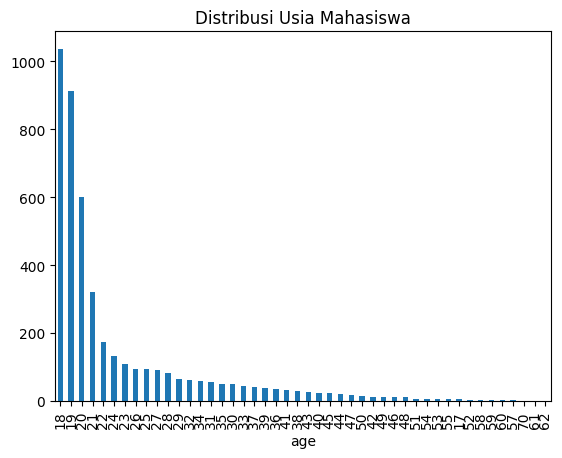

In [108]:
# Menampilkan distribusi usia

df['age'].value_counts().plot(kind='bar', title='Distribusi Usia Mahasiswa')


Ketika dataset ini diambil, sebagian besar mahasiswa berusia 18 dan 19 tahun. Rentang usia tertinggi yaitu 62 tahun.

## c. Distribusi gender

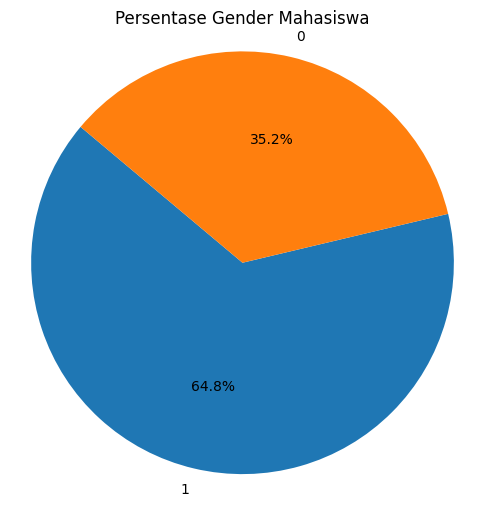

In [109]:
# Cek distribusi gender

gender_label = {1 : 'Laki-laki',
                0 : 'Perempuan'}
gender_count = df['gender'].map(gender_label).value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_count, labels=gender_label, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Gender Mahasiswa')
plt.axis('equal')
plt.show()

Mahasiswa laku-laki lebih banyak daripada mahasiswa perempuan.

## d. Distribusi usia berdasarkan target

<Axes: xlabel='target', ylabel='age'>

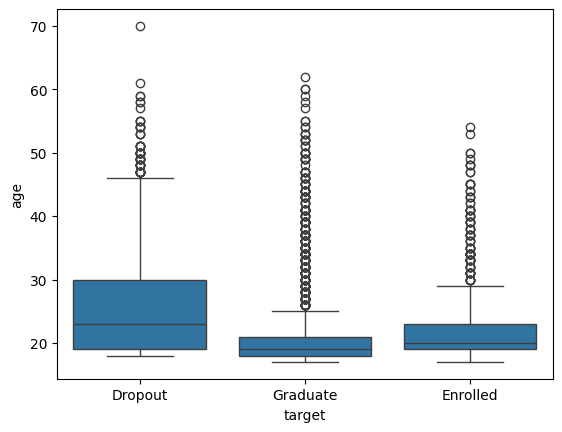

In [110]:
# Menampilkan distribusi usia

sns.boxplot(x='target', y='age', data=df)

Mahasiswa yang lulus cenderung berusia lebih muda. Sedangkan mahasiswa yang dropout terdapat usia yang tinggi, hal ini mungkin terjadi karena mahasiswa tersebut dropout setelah batas maksimal semester dilalui sehingga otomatis akan dropout.

## e. Rata-rata nilai berdasarkan target

In [111]:
# Rata-rata nilai grade berdasarkan target

df.groupby('target')[['sem1_grade', 'sem2_grade']].mean()

,sem1_grade,sem2_grade
target,,
Dropout,7.256656,5.899339
Enrolled,11.125257,11.117364
Graduate,12.643655,12.697276


Mahasiswa yang lulus memiliki rata-rata nilai yang tinggi, hingga bernilai 12. Mahasiswa yang masih mengikuti kuliah, juga memiliki rata-rata nilai yang cukup tinggi yaitu 11. Sedangkan untuk mahasiswa yang dropout, rata-rata nilainya rendah dan ada penurunan nilai di semester 2.

## f. Status pembayaran berdasarkan target

In [112]:
# Distribusi status pembayaran

pd.crosstab(df['tuition_fee'], df['target'], normalize='index') * 100


target,Dropout,Enrolled,Graduate
tuition_fee,,,
0,86.553030,7.954545,5.492424
1,24.743326,19.301848,55.954825


Pada data ini, 0 bernilai no dan 1 bernilai yes. Dapat diketahui bahwa mahasiswa yang dropout lebih banyak tidak membayar biaya pendidikan, sedangkan mahasiswa yang membayar biaya kuliah didominasi oleh yang lulus, diikuti oleh mahasiswa yang dropout.

## g. Rata-rata fitur ekonomi berdasarkan target

In [113]:
# Distribusi fitur ekonomi

df.groupby('target')[['gdp', 'unemployment_rate', 'inflation_rate']].mean()

,gdp,unemployment_rate,inflation_rate
target,,,
Dropout,-0.150859,11.616397,1.283955
Enrolled,0.053287,11.272544,1.211713
Graduate,0.081833,11.639339,1.197918


Dropout terjadi saat gdp rendah, sedangkan enrolled dan graduate memiliki gdp positif. Selain itu dropout juga sering terjadi saat inflasi tinggi. Hal ini dapat mengindikasikan bahwa putusnya kuliah dapat disebabkan oleh faktor ekonomi.<br>
Di samping itu, rata-rata unemployment rate tertinggi dipegang oleh graduate.

## h. Distribusi beasiswa

In [114]:
# Distribusi beasiswa berdasarkan target

pd.crosstab(df['scholarship'], df['target'], normalize='index') * 100

target,Dropout,Enrolled,Graduate
scholarship,,,
0,38.706767,19.969925,41.323308
1,12.192903,11.828935,75.978162


Sebagian besar yang mendapatkan beasiswa berada di kelompok graduate. Mahasiswa yang tidak mendapatkan beasiswa cukup banyak yang dropout. Melihat analisis sebelumnya, mungkin memang terdapat faktor ekonomi yang menyebabkan mahasiswa dropout.

# 5. Feature Engineering

## a. Handling Cardinality

In [115]:
# Cek info data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   marital_status        4424 non-null   int64  
 1   application_mode      4424 non-null   int64  
 2   application_order     4424 non-null   int64  
 3   course                4424 non-null   int64  
 4   daytime               4424 non-null   int64  
 5   prev_qualification    4424 non-null   int64  
 6   nationality           4424 non-null   int64  
 7   mother_qualification  4424 non-null   int64  
 8   father_qualification  4424 non-null   int64  
 9   mother_occupation     4424 non-null   int64  
 10  father_occupation     4424 non-null   int64  
 11  displaced             4424 non-null   int64  
 12  special_needs         4424 non-null   int64  
 13  debtor                4424 non-null   int64  
 14  tuition_fee           4424 non-null   int64  
 15  gender               

Meski data tersebut berisi angka kecuali target, ada banyak kolom kategoriknya. Yang termasuk kolom kategorik yaitu:
1. marital_status
2. application_mode
3. course
4. daytime
5. prev_qualification
6. nationality
7. mother_qualification
8. father_qualification
9. mother_occupation
10. father_occupation
11. displaced
12. special_needs
13. debtor
14. tuition_fee
15. gender
16. scholarship
17. international

In [116]:
# Mencari nilai unik setiap feature untuk menentukan kardinalitas

print('Number of categories in the variable marital_status        : {}'.format(len(df.marital_status.unique())))
print('Number of categories in the variable application_mode      : {}'.format(len(df.application_mode.unique())))
print('Number of categories in the varibale course                : {}'.format(len(df.course.unique())))
print('Number of categories in the variable daytime               : {}'.format(len(df.daytime.unique())))
print('Number of categories in the variable prev_qualification    : {}'.format(len(df.prev_qualification.unique())))
print('Number of categories in the variable nationality           : {}'.format(len(df.nationality.unique())))
print('Number of categories in the variable mother_qualification  : {}'.format(len(df.mother_qualification.unique())))
print('Number of categories in the variable father_qualification  : {}'.format(len(df.father_qualification.unique())))
print('Number of categories in the varibale mother_occupation     : {}'.format(len(df.mother_occupation.unique())))
print('Number of categories in the variable father_occupation     : {}'.format(len(df.father_occupation.unique())))
print('Number of categories in the variable displaced             : {}'.format(len(df.displaced.unique())))
print('Number of categories in the variable special_needs         : {}'.format(len(df.special_needs.unique())))
print('Number of categories in the variable debtor                : {}'.format(len(df.debtor.unique())))
print('Number of categories in the variable tuition_fee           : {}'.format(len(df.tuition_fee.unique())))
print('Number of categories in the varibale gender                : {}'.format(len(df.gender.unique())))
print('Number of categories in the variable scholarship           : {}'.format(len(df.scholarship.unique())))
print('Number of categories in the variable international         : {}'.format(len(df.international.unique())))

Number of categories in the variable marital_status        : 6
Number of categories in the variable application_mode      : 18
Number of categories in the varibale course                : 17
Number of categories in the variable daytime               : 2
Number of categories in the variable prev_qualification    : 17
Number of categories in the variable nationality           : 21
Number of categories in the variable mother_qualification  : 29
Number of categories in the variable father_qualification  : 34
Number of categories in the varibale mother_occupation     : 32
Number of categories in the variable father_occupation     : 46
Number of categories in the variable displaced             : 2
Number of categories in the variable special_needs         : 2
Number of categories in the variable debtor                : 2
Number of categories in the variable tuition_fee           : 2
Number of categories in the varibale gender                : 2
Number of categories in the variable scholarshi

Kardinalitas kolom application_mode, course, prev_qualification, nationality, mother_qualification, father_qualification, mother_occupation, dan father_occupation tinggi sehingga akan di handling.

### 1) Handling application_mode

In [117]:
# Menampilkan unik value dari application_mode

df.application_mode.unique()

array([ 8,  6,  1, 12,  9, 17, 15, 16, 14,  4, 13,  7,  3,  2,  5, 18, 10,
       11])

In [118]:
# Function untuk menyortir application_mode

def app(code):

    if code in [1, 17, 18] :
        return 'General contingent'

    elif code in [5, 16]:
        return 'Special contingent'

    elif code in [2, 10, 26, 27] :
        return 'Legal ordinances'

    elif code in [7, 42, 43, 44, 51, 53, 57] :
        return 'Other education holders'

    elif code == 15 :
        return 'International'

    else :
        return 'Lainnya'

In [119]:
# Menerapkan feature baru

df['app_mode_ringkas'] = df['application_mode'].apply(app)


In [120]:
df.head()

,marital_status,application_mode,application_order,course,daytime,prev_qualification,nationality,mother_qualification,father_qualification,mother_occupation,...,sem2_enrolled,sem2_eval,sem2_approved,sem2_grade,sem2_wo_eval,unemployment_rate,inflation_rate,gdp,target,app_mode_ringkas
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,Lainnya
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,Lainnya
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,General contingent
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,Lainnya
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,Lainnya


### 2) Handling course

In [121]:
# Menampilkan unik value dari course

df.course.unique()

array([ 2, 11,  5, 15,  3, 17, 12, 10, 14, 16,  6,  8, 13,  9,  4,  1,  7])

In [122]:
# Function untuk menyimpan course

def course_ringkas(code):

    if code in [3, 19, 33]:
        return 'Teknik'

    elif code in [17, 7, 6, 9070]:
        return 'Komunikasi'

    elif code in [14, 2, 5]:
        return 'Kesehatan'

    elif code in [8, 9]:
        return 'Pendidikan'

    elif code in [1, 4, 10]:
        return 'Ekonomi'

    else:
        return 'Lainnya'

In [123]:
# Menerapkan feature baru

df['course_ringkas'] = df['course'].apply(course_ringkas)


In [124]:
df.head()

,marital_status,application_mode,application_order,course,daytime,prev_qualification,nationality,mother_qualification,father_qualification,mother_occupation,...,sem2_eval,sem2_approved,sem2_grade,sem2_wo_eval,unemployment_rate,inflation_rate,gdp,target,app_mode_ringkas,course_ringkas
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,Lainnya,Kesehatan
1,1,6,1,11,1,1,1,1,3,4,...,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,Lainnya,Lainnya
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,General contingent,Kesehatan
3,1,8,2,15,1,1,1,23,27,6,...,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,Lainnya,Lainnya
4,2,12,1,3,0,1,1,22,28,10,...,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,Lainnya,Teknik


### 3) Handling prev_qualification

In [125]:
# Menampilkan unik value dari prev_qualification

df.prev_qualification.unique()

array([ 1, 12, 16, 14,  8,  3, 15,  2,  4,  9, 17, 11,  6,  7, 13,  5, 10])

In [126]:
# Funcition untuk menyederhanakan feature prev_qualification

def prev_qual_ringkas(code):

    if code in [1, 9, 10, 12, 14, 15, 19, 38]:
        return 'SMA'

    elif code in [2, 3, 4, 5, 6, 40, 43]:
        return 'Diploma / Strata'

    else:
        return 'Lainnya'

In [127]:
# Menerapkan funtion

df['prev_qualification_ringkas'] = df['prev_qualification'].apply(prev_qual_ringkas)


In [128]:
df.head()

,marital_status,application_mode,application_order,course,daytime,prev_qualification,nationality,mother_qualification,father_qualification,mother_occupation,...,sem2_approved,sem2_grade,sem2_wo_eval,unemployment_rate,inflation_rate,gdp,target,app_mode_ringkas,course_ringkas,prev_qualification_ringkas
0,1,8,5,2,1,1,1,13,10,6,...,0,0.000000,0,10.8,1.4,1.74,Dropout,Lainnya,Kesehatan,SMA
1,1,6,1,11,1,1,1,1,3,4,...,6,13.666667,0,13.9,-0.3,0.79,Graduate,Lainnya,Lainnya,SMA
2,1,1,5,5,1,1,1,22,27,10,...,0,0.000000,0,10.8,1.4,1.74,Dropout,General contingent,Kesehatan,SMA
3,1,8,2,15,1,1,1,23,27,6,...,5,12.400000,0,9.4,-0.8,-3.12,Graduate,Lainnya,Lainnya,SMA
4,2,12,1,3,0,1,1,22,28,10,...,6,13.000000,0,13.9,-0.3,0.79,Graduate,Lainnya,Teknik,SMA


### 4) Handling nationality

In [129]:
# Menampilkan unik value dari nationality

df.nationality.unique()

array([ 1, 15,  3, 14, 12, 18,  5, 11,  8, 17,  4,  9, 13, 16, 10, 21,  2,
       20, 19,  6,  7])

In [130]:
# Fungsi untuk menyimpan kategori negara

def negara(code):

    if code in [1, 2, 6, 11, 13, 14, 17, 32, 100, 103, 105] :
        return 'Europe'

    elif code in [21, 22, 24, 25, 26]:
        return 'Africa'

    elif code in [41, 62, 101, 108, 109]:
        return 'America'

    else :
        return 'Lainnya'

In [131]:
# Handling cardinalitas dengan mengganti kategori negara

df['continent'] = df['nationality'].apply(negara)

In [132]:
df.head()

,marital_status,application_mode,application_order,course,daytime,prev_qualification,nationality,mother_qualification,father_qualification,mother_occupation,...,sem2_grade,sem2_wo_eval,unemployment_rate,inflation_rate,gdp,target,app_mode_ringkas,course_ringkas,prev_qualification_ringkas,continent
0,1,8,5,2,1,1,1,13,10,6,...,0.000000,0,10.8,1.4,1.74,Dropout,Lainnya,Kesehatan,SMA,Europe
1,1,6,1,11,1,1,1,1,3,4,...,13.666667,0,13.9,-0.3,0.79,Graduate,Lainnya,Lainnya,SMA,Europe
2,1,1,5,5,1,1,1,22,27,10,...,0.000000,0,10.8,1.4,1.74,Dropout,General contingent,Kesehatan,SMA,Europe
3,1,8,2,15,1,1,1,23,27,6,...,12.400000,0,9.4,-0.8,-3.12,Graduate,Lainnya,Lainnya,SMA,Europe
4,2,12,1,3,0,1,1,22,28,10,...,13.000000,0,13.9,-0.3,0.79,Graduate,Lainnya,Teknik,SMA,Europe


### 5) Handling mother_qualification

In [133]:
# Menampilkan unik value dari mother_qualification

df.mother_qualification.unique()

array([13,  1, 22, 23,  3,  4, 27,  2, 19, 10, 25,  7,  5, 24,  9, 26, 18,
       11, 20, 21,  6,  8, 17, 28, 12, 14, 16, 15, 29])

In [134]:
# function untuk menyimpan kategori pendidikan yang lebih ringkas

def study_ringkas(code):

    if code == 1 :
        return 'SMA'

    elif code in [2, 3, 4, 5, 6, 22] :
        return 'Diploma / Strata'

    elif code in [9, 10, 11, 12, 14, 19, 26, 27, 28] :
        return 'SMP'

    else :
        return 'Lainnya'

In [135]:
# Handling cardinalitas dengan mengganti kategori pendidikan

df['mother_qualification_ringkas'] = df['mother_qualification'].apply(study_ringkas)

In [136]:
df.head()

,marital_status,application_mode,application_order,course,daytime,prev_qualification,nationality,mother_qualification,father_qualification,mother_occupation,...,sem2_wo_eval,unemployment_rate,inflation_rate,gdp,target,app_mode_ringkas,course_ringkas,prev_qualification_ringkas,continent,mother_qualification_ringkas
0,1,8,5,2,1,1,1,13,10,6,...,0,10.8,1.4,1.74,Dropout,Lainnya,Kesehatan,SMA,Europe,Lainnya
1,1,6,1,11,1,1,1,1,3,4,...,0,13.9,-0.3,0.79,Graduate,Lainnya,Lainnya,SMA,Europe,SMA
2,1,1,5,5,1,1,1,22,27,10,...,0,10.8,1.4,1.74,Dropout,General contingent,Kesehatan,SMA,Europe,Diploma / Strata
3,1,8,2,15,1,1,1,23,27,6,...,0,9.4,-0.8,-3.12,Graduate,Lainnya,Lainnya,SMA,Europe,Lainnya
4,2,12,1,3,0,1,1,22,28,10,...,0,13.9,-0.3,0.79,Graduate,Lainnya,Teknik,SMA,Europe,Diploma / Strata


### 6) Handling father_qualification

In [137]:
# Menampilkan unik value dari father_qualification

df.father_qualification.unique()

array([10,  3, 27, 28,  1, 14,  5,  4, 24,  2, 29,  9,  7, 26, 18, 30, 12,
       15, 25, 31, 16, 11, 20, 33, 13, 32,  8,  6, 21, 17, 34, 23, 19, 22])

In [138]:
# Handling cardinalitas dengan mengganti kategori pendidikan

df['father_qualification_ringkas'] = df['father_qualification'].apply(study_ringkas)

In [139]:
df.head()

,marital_status,application_mode,application_order,course,daytime,prev_qualification,nationality,mother_qualification,father_qualification,mother_occupation,...,unemployment_rate,inflation_rate,gdp,target,app_mode_ringkas,course_ringkas,prev_qualification_ringkas,continent,mother_qualification_ringkas,father_qualification_ringkas
0,1,8,5,2,1,1,1,13,10,6,...,10.8,1.4,1.74,Dropout,Lainnya,Kesehatan,SMA,Europe,Lainnya,SMP
1,1,6,1,11,1,1,1,1,3,4,...,13.9,-0.3,0.79,Graduate,Lainnya,Lainnya,SMA,Europe,SMA,Diploma / Strata
2,1,1,5,5,1,1,1,22,27,10,...,10.8,1.4,1.74,Dropout,General contingent,Kesehatan,SMA,Europe,Diploma / Strata,SMP
3,1,8,2,15,1,1,1,23,27,6,...,9.4,-0.8,-3.12,Graduate,Lainnya,Lainnya,SMA,Europe,Lainnya,SMP
4,2,12,1,3,0,1,1,22,28,10,...,13.9,-0.3,0.79,Graduate,Lainnya,Teknik,SMA,Europe,Diploma / Strata,SMP


### 7) Handling mother_occupation

In [140]:
# Menampilkan unik value dari mother_occupation

df.mother_occupation.unique()

array([ 6,  4, 10,  8,  5,  2, 16,  1,  7,  3, 12,  9, 20, 28, 13, 29, 23,
       32, 30, 18, 24, 19, 11, 21, 15, 27, 31, 14, 22, 17, 26, 25])

In [141]:
# function untuk menyimpan kategori pekerjaan yang lebih ringkas

def job_ringkas(code):

    if code in [1, 2, 3, 4, 7, 8] :
        return 'Pekerja swasta'

    elif code in [5, 10, 11] :
        return 'ASN'

    elif code in [6, 9] :
        return 'Wiraswasta'

    else :
        return 'Lainnya'

In [142]:
# Handling cardinality dengan menyesuaikan kategori pekerjaan yang lebih ringkas

df['mother_occupation_ringkas'] = df['mother_occupation'].apply(job_ringkas)

In [143]:
df.head()

,marital_status,application_mode,application_order,course,daytime,prev_qualification,nationality,mother_qualification,father_qualification,mother_occupation,...,inflation_rate,gdp,target,app_mode_ringkas,course_ringkas,prev_qualification_ringkas,continent,mother_qualification_ringkas,father_qualification_ringkas,mother_occupation_ringkas
0,1,8,5,2,1,1,1,13,10,6,...,1.4,1.74,Dropout,Lainnya,Kesehatan,SMA,Europe,Lainnya,SMP,Wiraswasta
1,1,6,1,11,1,1,1,1,3,4,...,-0.3,0.79,Graduate,Lainnya,Lainnya,SMA,Europe,SMA,Diploma / Strata,Pekerja swasta
2,1,1,5,5,1,1,1,22,27,10,...,1.4,1.74,Dropout,General contingent,Kesehatan,SMA,Europe,Diploma / Strata,SMP,ASN
3,1,8,2,15,1,1,1,23,27,6,...,-0.8,-3.12,Graduate,Lainnya,Lainnya,SMA,Europe,Lainnya,SMP,Wiraswasta
4,2,12,1,3,0,1,1,22,28,10,...,-0.3,0.79,Graduate,Lainnya,Teknik,SMA,Europe,Diploma / Strata,SMP,ASN


### 8) Handling father_occupation

In [144]:
# Menampilkan unik value dari kolom father_ovvupation

df.father_occupation.unique()

array([10,  4,  8, 11,  6,  9,  5,  2,  3, 22,  7,  1, 12, 39, 19, 13, 29,
       46, 43, 34, 44, 30, 41, 24, 23, 45, 35, 26, 28, 36, 16, 37, 31, 42,
       20, 15, 40, 25, 21, 17, 32, 38, 27, 18, 14, 33])

In [145]:
# Handling cardinalitas dengan mengganti kategori pekerjaan

df['father_occupation_ringkas'] = df['father_occupation'].apply(job_ringkas)

In [146]:
df.head()

,marital_status,application_mode,application_order,course,daytime,prev_qualification,nationality,mother_qualification,father_qualification,mother_occupation,...,gdp,target,app_mode_ringkas,course_ringkas,prev_qualification_ringkas,continent,mother_qualification_ringkas,father_qualification_ringkas,mother_occupation_ringkas,father_occupation_ringkas
0,1,8,5,2,1,1,1,13,10,6,...,1.74,Dropout,Lainnya,Kesehatan,SMA,Europe,Lainnya,SMP,Wiraswasta,ASN
1,1,6,1,11,1,1,1,1,3,4,...,0.79,Graduate,Lainnya,Lainnya,SMA,Europe,SMA,Diploma / Strata,Pekerja swasta,Pekerja swasta
2,1,1,5,5,1,1,1,22,27,10,...,1.74,Dropout,General contingent,Kesehatan,SMA,Europe,Diploma / Strata,SMP,ASN,ASN
3,1,8,2,15,1,1,1,23,27,6,...,-3.12,Graduate,Lainnya,Lainnya,SMA,Europe,Lainnya,SMP,Wiraswasta,Pekerja swasta
4,2,12,1,3,0,1,1,22,28,10,...,0.79,Graduate,Lainnya,Teknik,SMA,Europe,Diploma / Strata,SMP,ASN,ASN


### 9) New dataset after handling cardinality

In [147]:
# Cek kolom terkini

df.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime', 'prev_qualification', 'nationality', 'mother_qualification',
       'father_qualification', 'mother_occupation', 'father_occupation',
       'displaced', 'special_needs', 'debtor', 'tuition_fee', 'gender',
       'scholarship', 'age', 'international', 'sem1_credited', 'sem1_enrolled',
       'sem1_eval', 'sem1_approved', 'sem1_grade', 'sem1_wo_eval',
       'sem2_credited', 'sem2_enrolled', 'sem2_eval', 'sem2_approved',
       'sem2_grade', 'sem2_wo_eval', 'unemployment_rate', 'inflation_rate',
       'gdp', 'target', 'app_mode_ringkas', 'course_ringkas',
       'prev_qualification_ringkas', 'continent',
       'mother_qualification_ringkas', 'father_qualification_ringkas',
       'mother_occupation_ringkas', 'father_occupation_ringkas'],
      dtype='object')

In [148]:
# Drop kolom asli

df = df.drop(['application_mode', 'course', 'prev_qualification', 'nationality', 'mother_qualification', 'father_qualification', 'mother_occupation', 'father_occupation'], axis=1)

In [149]:
df.head()

,marital_status,application_order,daytime,displaced,special_needs,debtor,tuition_fee,gender,scholarship,age,...,gdp,target,app_mode_ringkas,course_ringkas,prev_qualification_ringkas,continent,mother_qualification_ringkas,father_qualification_ringkas,mother_occupation_ringkas,father_occupation_ringkas
0,1,5,1,1,0,0,1,1,0,20,...,1.74,Dropout,Lainnya,Kesehatan,SMA,Europe,Lainnya,SMP,Wiraswasta,ASN
1,1,1,1,1,0,0,0,1,0,19,...,0.79,Graduate,Lainnya,Lainnya,SMA,Europe,SMA,Diploma / Strata,Pekerja swasta,Pekerja swasta
2,1,5,1,1,0,0,0,1,0,19,...,1.74,Dropout,General contingent,Kesehatan,SMA,Europe,Diploma / Strata,SMP,ASN,ASN
3,1,2,1,1,0,0,1,0,0,20,...,-3.12,Graduate,Lainnya,Lainnya,SMA,Europe,Lainnya,SMP,Wiraswasta,Pekerja swasta
4,2,1,0,0,0,0,1,0,0,45,...,0.79,Graduate,Lainnya,Teknik,SMA,Europe,Diploma / Strata,SMP,ASN,ASN


## b. Splitting Train and Test

### 1) Splitting Between X and Y

In [150]:
# Splitting antara features dan target

X = df.drop(['target'], axis=1)
y = df['target']

X

,marital_status,application_order,daytime,displaced,special_needs,debtor,tuition_fee,gender,scholarship,age,...,inflation_rate,gdp,app_mode_ringkas,course_ringkas,prev_qualification_ringkas,continent,mother_qualification_ringkas,father_qualification_ringkas,mother_occupation_ringkas,father_occupation_ringkas
0,1,5,1,1,0,0,1,1,0,20,...,1.4,1.74,Lainnya,Kesehatan,SMA,Europe,Lainnya,SMP,Wiraswasta,ASN
1,1,1,1,1,0,0,0,1,0,19,...,-0.3,0.79,Lainnya,Lainnya,SMA,Europe,SMA,Diploma / Strata,Pekerja swasta,Pekerja swasta
2,1,5,1,1,0,0,0,1,0,19,...,1.4,1.74,General contingent,Kesehatan,SMA,Europe,Diploma / Strata,SMP,ASN,ASN
3,1,2,1,1,0,0,1,0,0,20,...,-0.8,-3.12,Lainnya,Lainnya,SMA,Europe,Lainnya,SMP,Wiraswasta,Pekerja swasta
4,2,1,0,0,0,0,1,0,0,45,...,-0.3,0.79,Lainnya,Teknik,SMA,Europe,Diploma / Strata,SMP,ASN,ASN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,1,0,0,0,1,1,0,19,...,2.8,-4.06,General contingent,Lainnya,SMA,Europe,SMA,SMA,Wiraswasta,ASN
4420,1,2,1,1,0,1,0,0,0,18,...,0.6,2.02,General contingent,Lainnya,SMA,Lainnya,SMA,SMA,ASN,ASN
4421,1,1,1,1,0,0,1,0,1,30,...,-0.3,0.79,General contingent,Lainnya,SMA,Europe,Diploma / Strata,SMP,ASN,ASN
4422,1,1,1,1,0,0,1,0,1,20,...,-0.8,-3.12,General contingent,Pendidikan,SMA,Europe,Diploma / Strata,SMP,Pekerja swasta,ASN


### 2) Splitting between train set and test set

In [151]:
# Splitting antara train set dan test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.18, random_state = 8)

print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (3627, 34)
Test Size (797, 34)


## c. Outliers Handling

### 1) Cek outlier

In [152]:
# Cek kolom X_train

X_train.columns

Index(['marital_status', 'application_order', 'daytime', 'displaced',
       'special_needs', 'debtor', 'tuition_fee', 'gender', 'scholarship',
       'age', 'international', 'sem1_credited', 'sem1_enrolled', 'sem1_eval',
       'sem1_approved', 'sem1_grade', 'sem1_wo_eval', 'sem2_credited',
       'sem2_enrolled', 'sem2_eval', 'sem2_approved', 'sem2_grade',
       'sem2_wo_eval', 'unemployment_rate', 'inflation_rate', 'gdp',
       'app_mode_ringkas', 'course_ringkas', 'prev_qualification_ringkas',
       'continent', 'mother_qualification_ringkas',
       'father_qualification_ringkas', 'mother_occupation_ringkas',
       'father_occupation_ringkas'],
      dtype='object')

In [153]:
# Cek distribusi skewness

num_cols = ['application_order', 'age', 'sem1_credited', 'sem1_enrolled', 'sem1_eval',
            'sem1_approved', 'sem1_grade', 'sem1_wo_eval', 'sem2_credited',
            'sem2_enrolled', 'sem2_eval', 'sem2_approved', 'sem2_grade',
            'sem2_wo_eval', 'unemployment_rate', 'inflation_rate', 'gdp']

# Untuk menyimpan data pada proses perulangan

listItem = []

for col in num_cols:

    listItem.append([col, round(X_train[col].skew(), 1), np.where(
        (round(X_train[col].skew(), 1) <= 0.5) & (round(X_train[col].skew(), 1) >= - 0.5),
        'normal',
        'skewed'
    )])

skewness = pd.DataFrame(columns=['nama_kolom', 'nilai_skew', 'distribusi'], data=listItem)

skewness

,nama_kolom,nilai_skew,distribusi
0,application_order,1.8,skewed
1,age,2.0,skewed
2,sem1_credited,4.2,skewed
3,sem1_enrolled,1.7,skewed
4,sem1_eval,1.0,skewed
5,sem1_approved,0.8,skewed
6,sem1_grade,-1.6,skewed
7,sem1_wo_eval,8.0,skewed
8,sem2_credited,4.6,skewed
9,sem2_enrolled,0.9,skewed


In [154]:
# Mendapatkan nilai upper boundaries, lower boundaries, dan persentase outlier

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama_kolom'][row]
  #checking upper and lower boundary
  if skewness['distribusi'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})

outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,application_order,5.00,-2.00,3.06
1,age,43.00,1.00,3.61
2,sem1_credited,0.00,0.00,13.15
3,sem1_enrolled,13.00,-1.00,2.54
4,sem1_eval,22.00,-6.00,0.80
5,sem1_approved,15.00,-6.00,0.96
6,sem1_grade,20.57,3.82,15.88
7,sem1_wo_eval,0.00,0.00,6.64
8,sem2_credited,0.00,0.00,12.19
9,sem2_enrolled,13.00,-1.00,1.08


In [155]:
# Membandingkan dengan statistik

X_train[num_cols].describe().round(2)

,application_order,age,sem1_credited,sem1_enrolled,sem1_eval,sem1_approved,sem1_grade,sem1_wo_eval,sem2_credited,sem2_enrolled,sem2_eval,sem2_approved,sem2_grade,sem2_wo_eval,unemployment_rate,inflation_rate,gdp
count,3627.00,3627.00,3627.00,3627.00,3627.00,3627.00,3627.00,3627.00,3627.00,3627.00,3627.00,3627.00,3627.00,3627.00,3627.00,3627.00,3627.00
mean,1.74,23.22,0.73,6.28,8.32,4.74,10.67,0.14,0.56,6.24,8.11,4.48,10.30,0.15,11.58,1.23,0.01
std,1.32,7.53,2.42,2.51,4.18,3.11,4.80,0.67,1.98,2.22,3.96,3.02,5.17,0.76,2.67,1.38,2.27
min,1.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06
25%,1.00,19.00,0.00,5.00,6.00,3.00,11.00,0.00,0.00,5.00,6.00,2.00,10.93,0.00,9.40,0.30,-1.70
50%,1.00,20.00,0.00,6.00,8.00,5.00,12.33,0.00,0.00,6.00,8.00,5.00,12.24,0.00,11.10,1.40,0.32
75%,2.00,25.00,0.00,7.00,10.00,6.00,13.39,0.00,0.00,7.00,10.00,6.00,13.39,0.00,13.90,2.60,1.79
max,9.00,70.00,20.00,26.00,45.00,26.00,18.88,12.00,19.00,23.00,28.00,20.00,18.57,12.00,16.20,3.70,3.51


### 2) Outlier Handling

Untuk kolom application_order, sem1_credited, sem1_wo_eval, sem2_credited, dan sem2_wo_eval tidak akan di handle karena persebaran data terlalu rendah.<br>
Sedangkan untuk kolom unemploymnent_rate, inflation_rate, dan gdp tidak ada outlier.

In [156]:
# Kolom yang akan di handle menggunakan metode capping
cols_to_cap = ['age', 'sem1_enrolled', 'sem1_eval', 'sem1_approved',
               'sem1_grade', 'sem2_enrolled', 'sem2_eval',
               'sem2_approved', 'sem2_grade']

X_train_capped = X_train
X_test_capped = X_test

# Lakukan capping per kolom, perulangan
for col in cols_to_cap:
    winsor = Winsorizer(capping_method='iqr',
                        tail='both',
                        fold=3,
                        variables=[col],
                        missing_values='ignore')

    # Fit dan transform pada training set
    X_train_capped = winsor.fit_transform(X_train_capped)

    # Transform pada test set
    X_test_capped = winsor.transform(X_test_capped)


### 3) Cek data sebelum dan setelah di handling outliernya

In [157]:
# Function untuk cek keberadaan outlier

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

age - Sebelum Capping


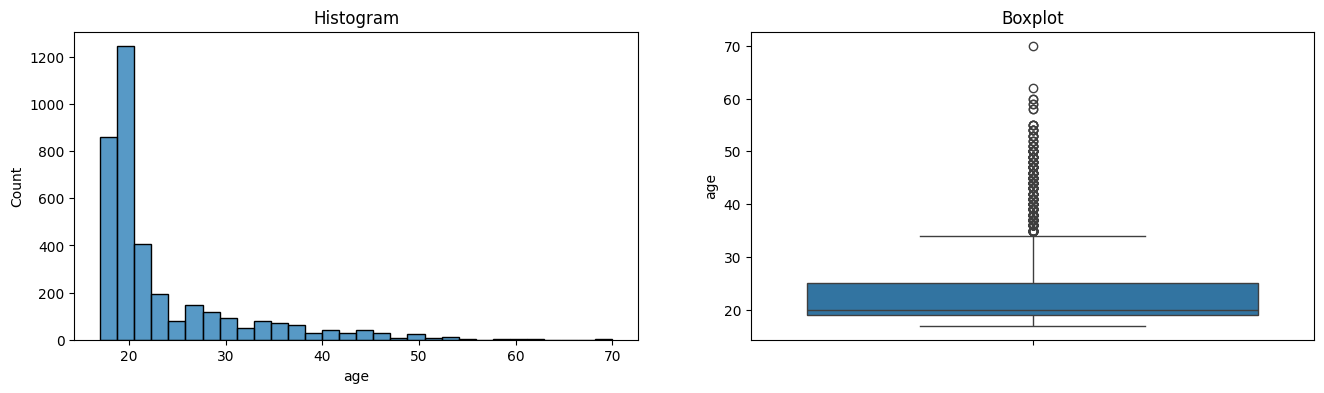


 age - Setelah Capping


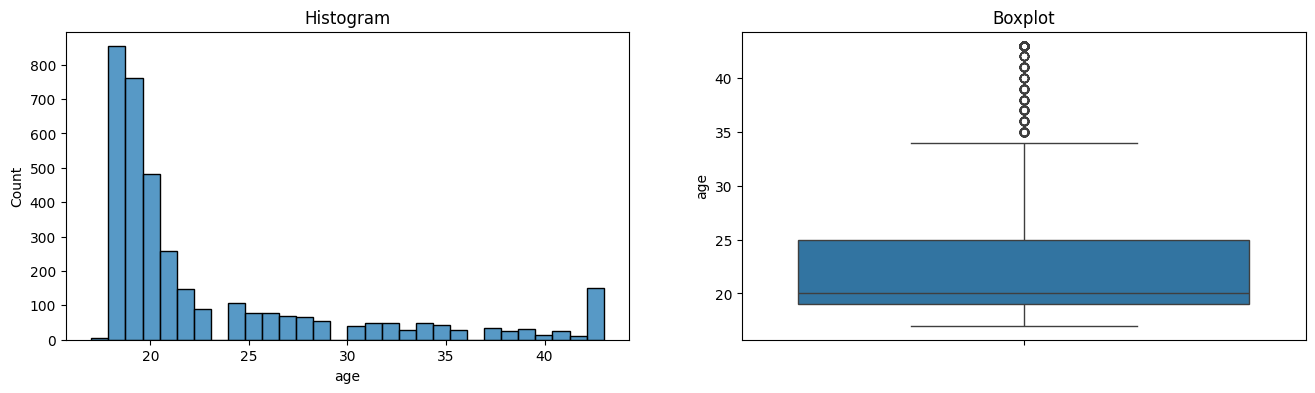

sem1_enrolled - Sebelum Capping


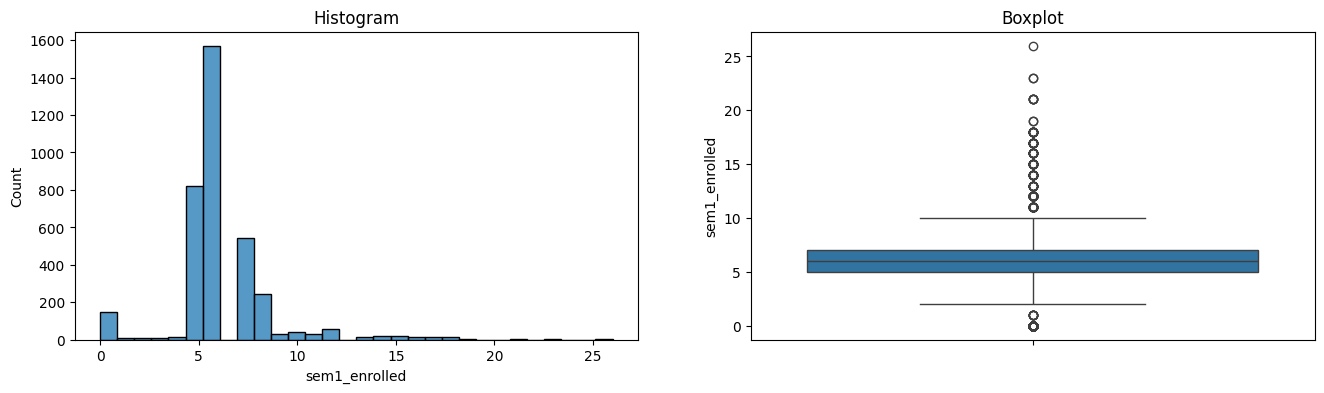


 sem1_enrolled - Setelah Capping


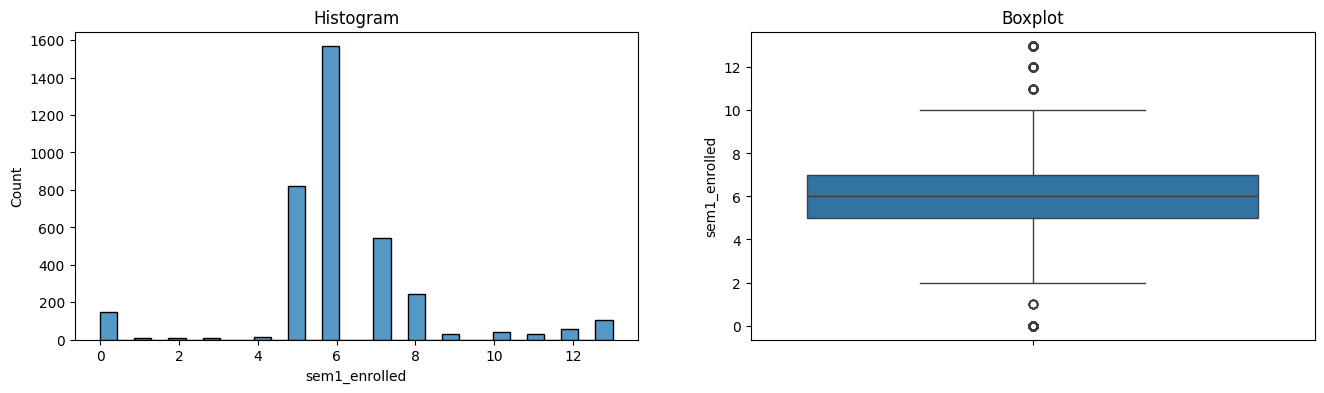

sem1_eval - Sebelum Capping


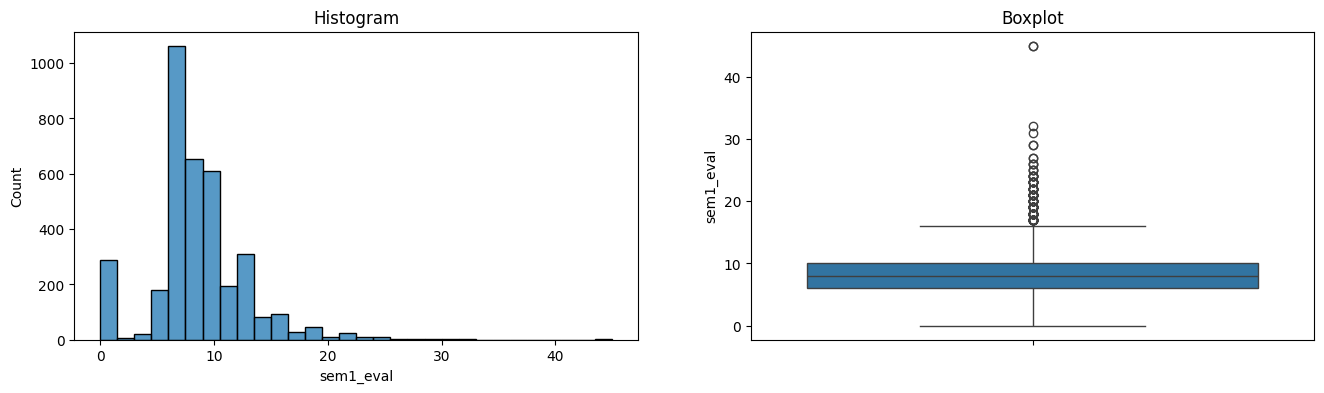


 sem1_eval - Setelah Capping


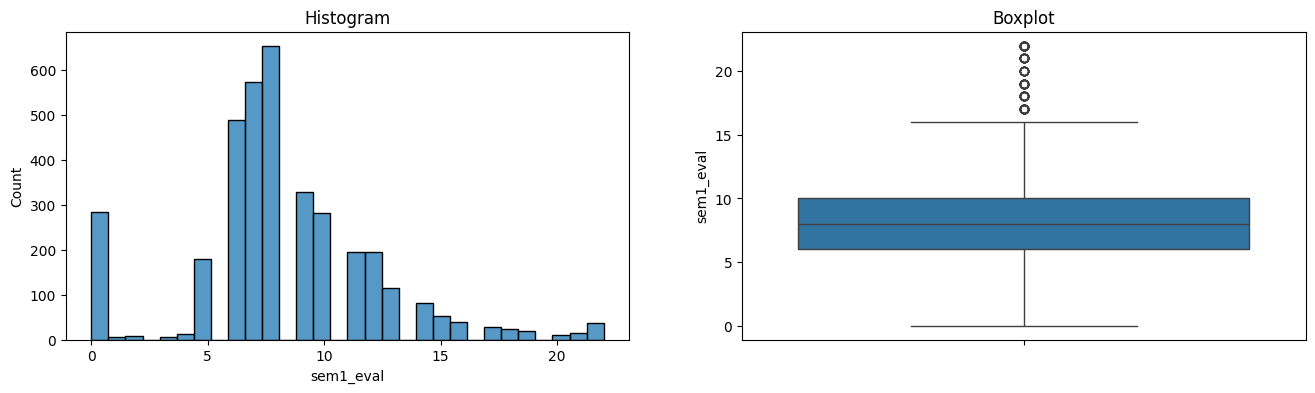

sem1_approved - Sebelum Capping


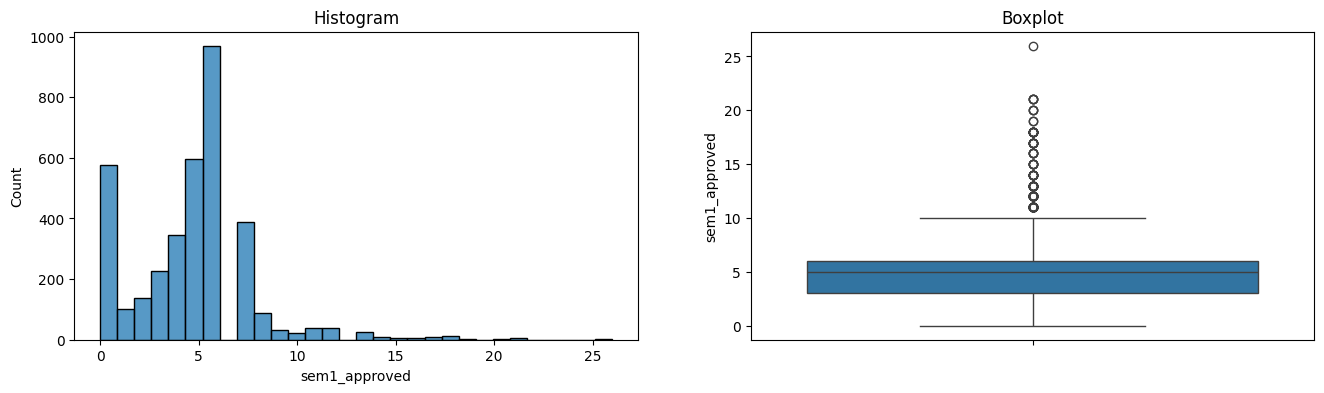


 sem1_approved - Setelah Capping


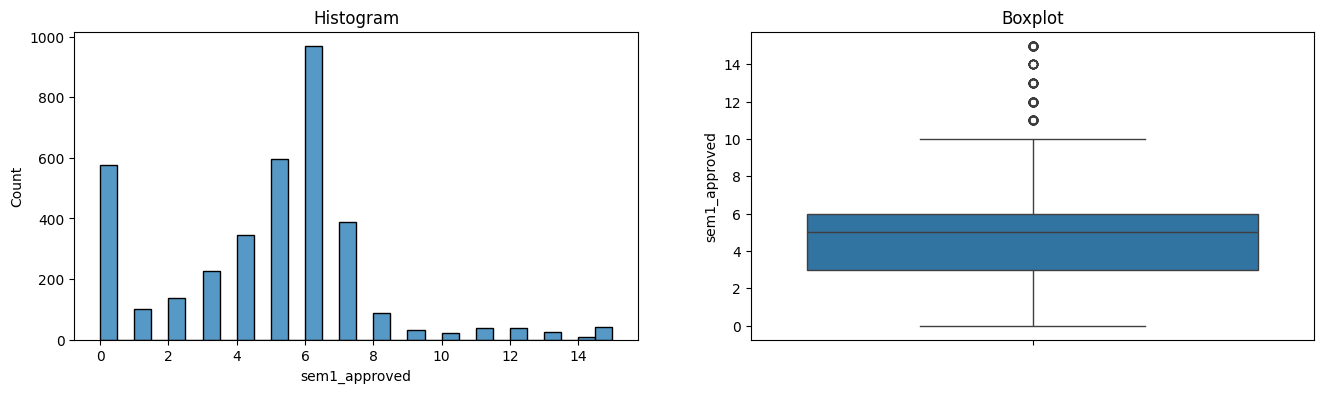

sem1_grade - Sebelum Capping


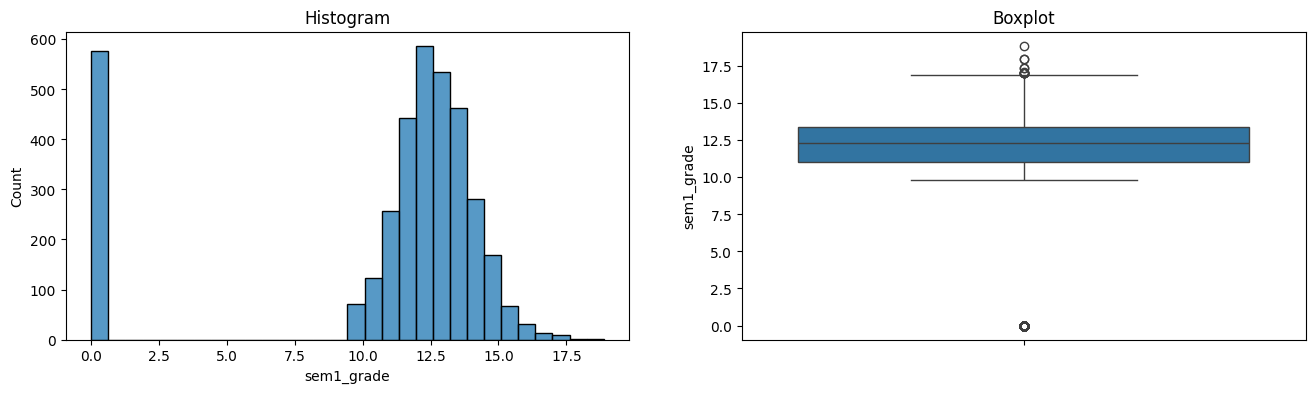


 sem1_grade - Setelah Capping


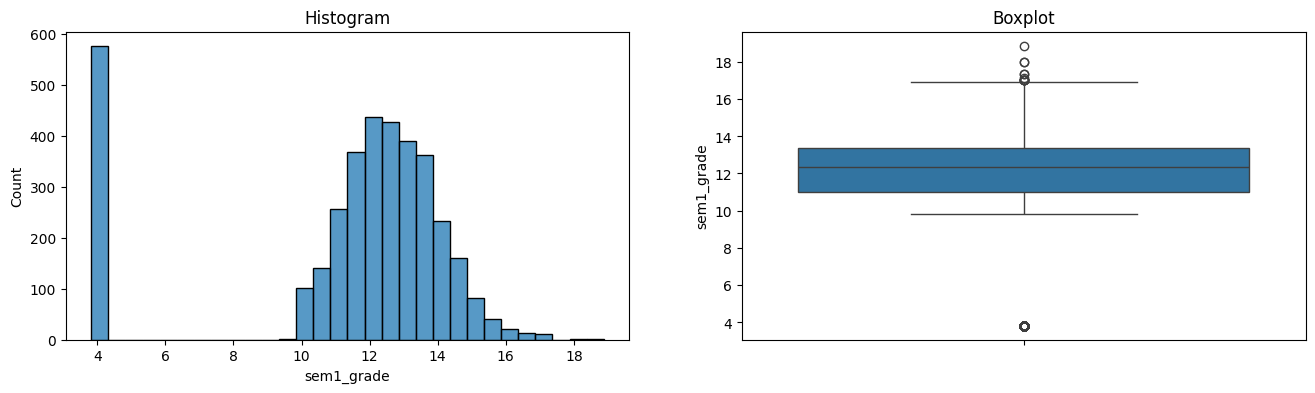

sem2_enrolled - Sebelum Capping


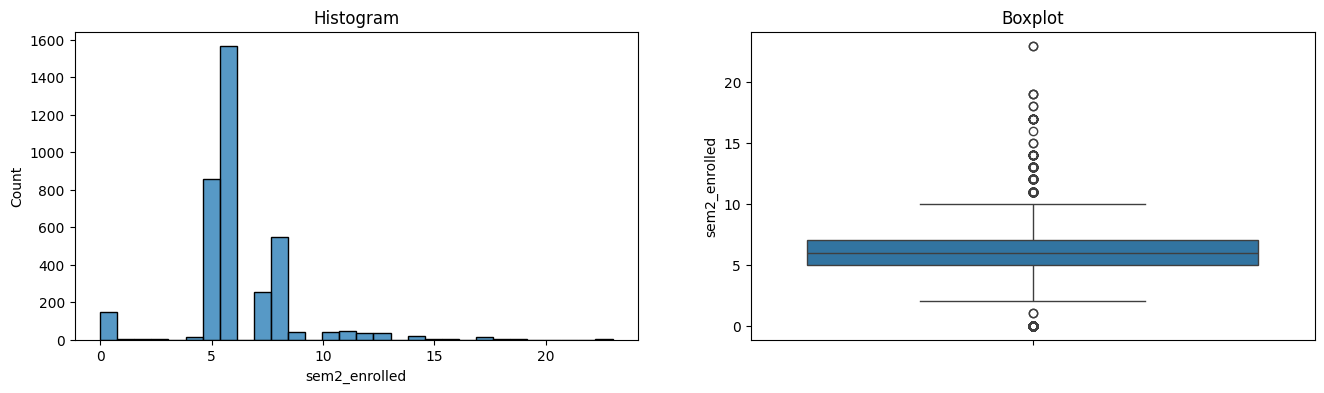


 sem2_enrolled - Setelah Capping


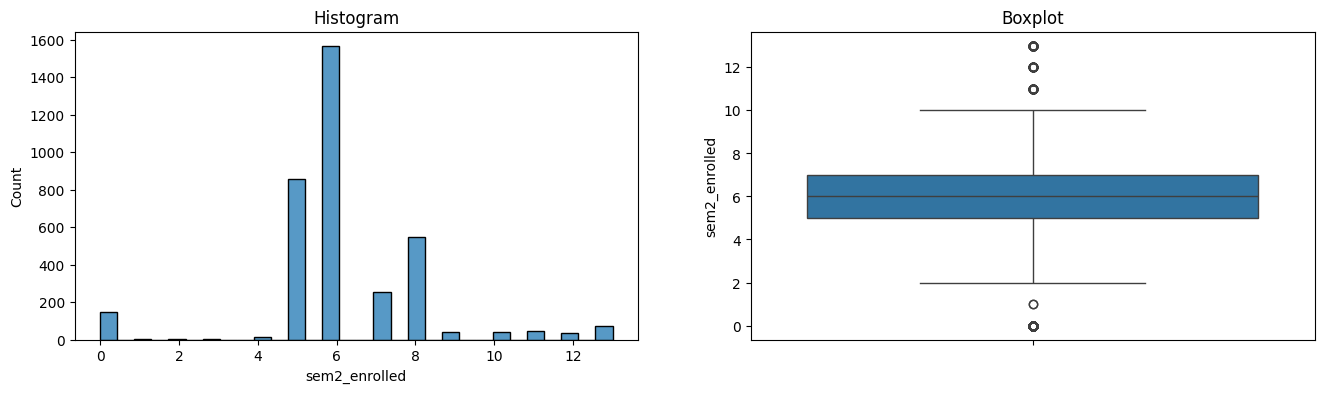

sem2_eval - Sebelum Capping


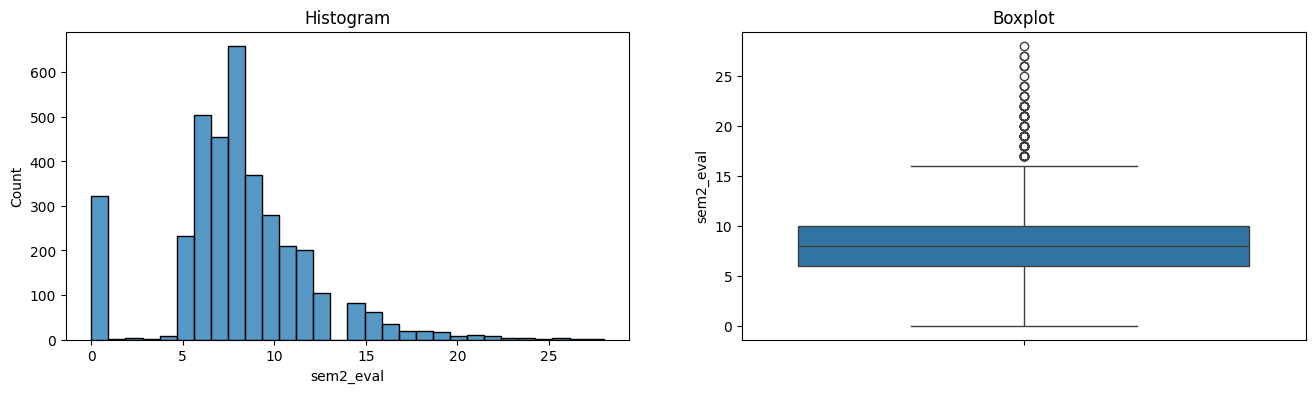


 sem2_eval - Setelah Capping


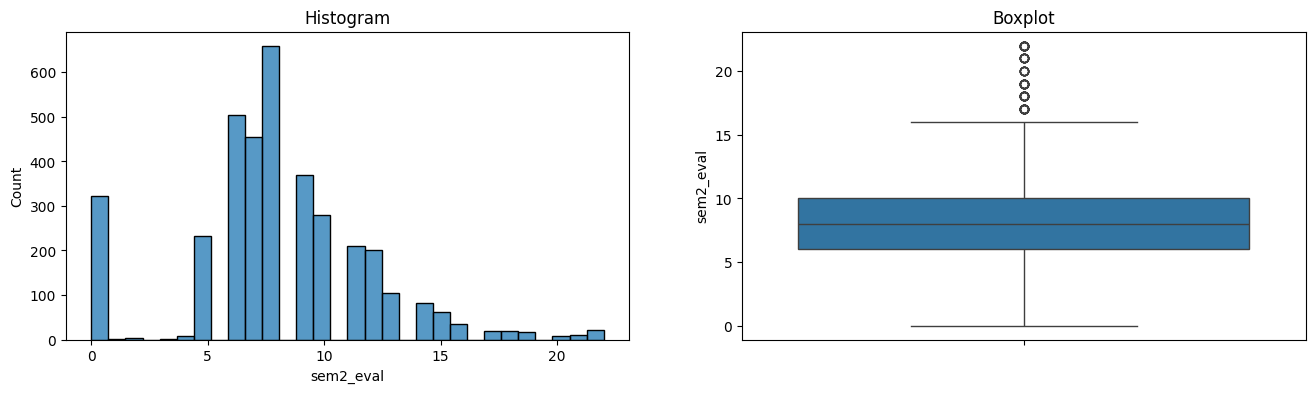

sem2_approved - Sebelum Capping


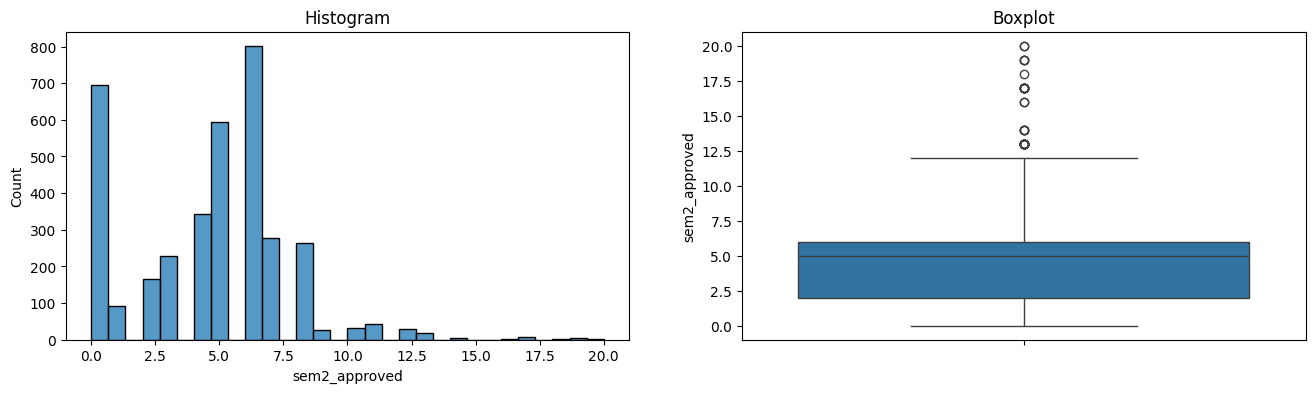


 sem2_approved - Setelah Capping


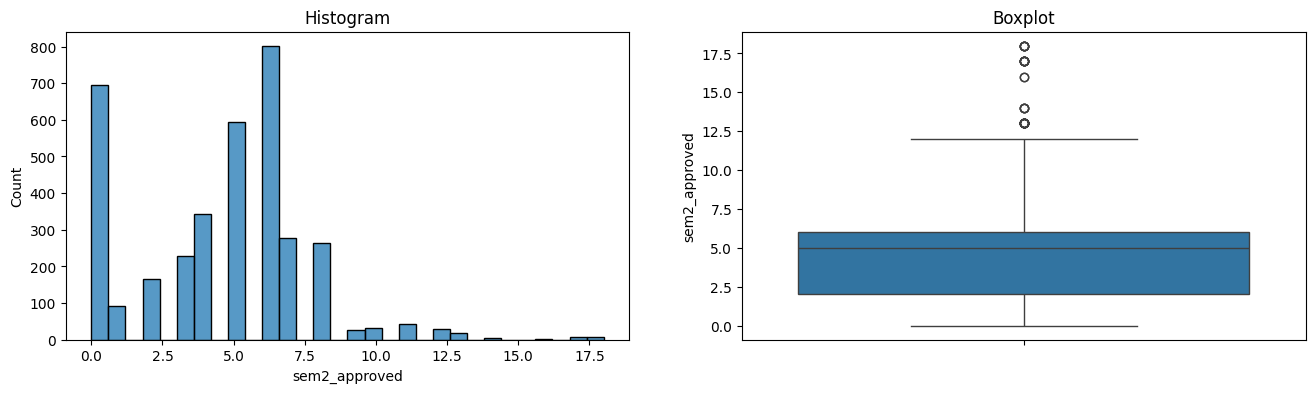

sem2_grade - Sebelum Capping


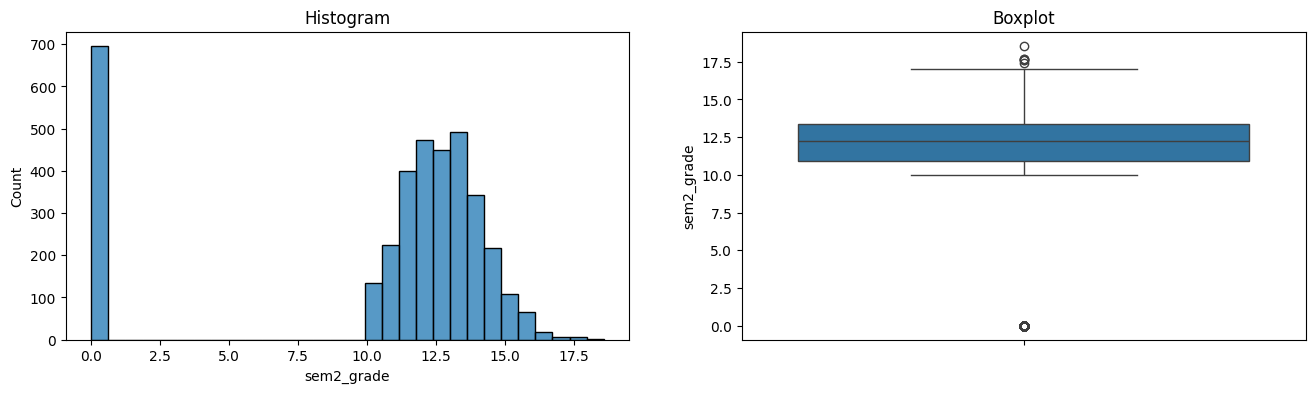


 sem2_grade - Setelah Capping


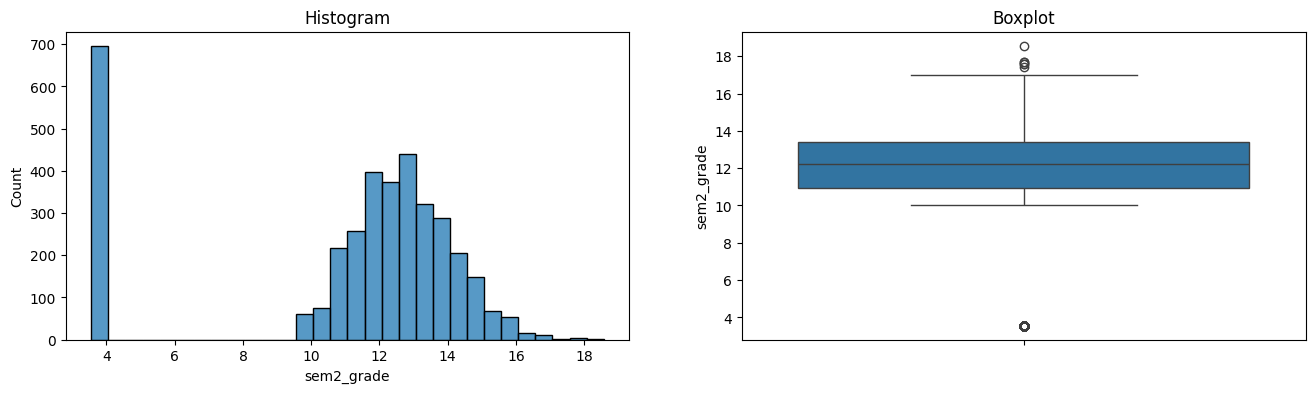

In [158]:
# Menampilkan outlier sebelum dan setelah

for col in cols_to_cap:

    print(col, '- Sebelum Capping')
    diagnostic_plots(X_train, col)

    print('\n', col, '- Setelah Capping')
    diagnostic_plots(X_train_capped, col)

## d. Missing Value

In [159]:
# CEk banyaknya missing value

X_train_capped.isnull().sum()[X_train_capped.isnull().sum() != 0]

,0


In [160]:
# CEk banyaknya missing value

X_test_capped.isnull().sum()[X_test_capped.isnull().sum() != 0]

,0


Tidak ada missing value, proses akan dilanjutkan ke tahap berikutnya.

## e. Splitting Numeric and Categorical

In [161]:
# Cek kolom X_train_capped yang telah di handling sebelumnya

X_train_capped.columns

Index(['marital_status', 'application_order', 'daytime', 'displaced',
       'special_needs', 'debtor', 'tuition_fee', 'gender', 'scholarship',
       'age', 'international', 'sem1_credited', 'sem1_enrolled', 'sem1_eval',
       'sem1_approved', 'sem1_grade', 'sem1_wo_eval', 'sem2_credited',
       'sem2_enrolled', 'sem2_eval', 'sem2_approved', 'sem2_grade',
       'sem2_wo_eval', 'unemployment_rate', 'inflation_rate', 'gdp',
       'app_mode_ringkas', 'course_ringkas', 'prev_qualification_ringkas',
       'continent', 'mother_qualification_ringkas',
       'father_qualification_ringkas', 'mother_occupation_ringkas',
       'father_occupation_ringkas'],
      dtype='object')

In [162]:
# Membagi kolom ke jenis yang sesuai

num_cols = ['application_order', 'age', 'sem1_credited', 'sem1_enrolled', 'sem1_eval', 'sem1_approved',
            'sem1_grade', 'sem1_wo_eval', 'sem2_credited', 'sem2_enrolled',
            'sem2_eval', 'sem2_approved', 'sem2_grade', 'sem2_wo_eval',
            'unemployment_rate', 'inflation_rate', 'gdp']

cat_cols = ['marital_status', 'daytime', 'displaced',
            'special_needs', 'debtor', 'tuition_fee', 'gender', 'scholarship',
            'international', 'app_mode_ringkas', 'course_ringkas', 'prev_qualification_ringkas',
            'continent', 'mother_qualification_ringkas', 'father_qualification_ringkas',
            'mother_occupation_ringkas', 'father_occupation_ringkas']

In [163]:
# Memasukkan kolom yang telah terbagi ke variabel baru

num_columns = X_train_capped[num_cols]

cat_columns = X_train_capped[cat_cols]

print('Numeric Columns     : ', list(num_columns))
print('Categorical Columns :', list(cat_columns))

Numeric Columns     :  ['application_order', 'age', 'sem1_credited', 'sem1_enrolled', 'sem1_eval', 'sem1_approved', 'sem1_grade', 'sem1_wo_eval', 'sem2_credited', 'sem2_enrolled', 'sem2_eval', 'sem2_approved', 'sem2_grade', 'sem2_wo_eval', 'unemployment_rate', 'inflation_rate', 'gdp']
Categorical Columns : ['marital_status', 'daytime', 'displaced', 'special_needs', 'debtor', 'tuition_fee', 'gender', 'scholarship', 'international', 'app_mode_ringkas', 'course_ringkas', 'prev_qualification_ringkas', 'continent', 'mother_qualification_ringkas', 'father_qualification_ringkas', 'mother_occupation_ringkas', 'father_occupation_ringkas']


In [164]:
# Split numerical dan categorical kolom

# Numeric

X_train_num = X_train_capped[num_cols]

X_test_num = X_test_capped[num_cols]

# Categorical

X_train_cat = X_train_capped[cat_cols]

X_test_cat = X_train_capped[cat_cols]

X_train_num

,application_order,age,sem1_credited,sem1_enrolled,sem1_eval,sem1_approved,sem1_grade,sem1_wo_eval,sem2_credited,sem2_enrolled,sem2_eval,sem2_approved,sem2_grade,sem2_wo_eval,unemployment_rate,inflation_rate,gdp
2031,1,43,4,10,12,5,12.166667,4,2,8,8,0,3.554750,2,12.7,3.7,-1.70
786,1,18,0,6,6,6,13.666667,0,0,6,6,5,14.000000,0,12.7,3.7,-1.70
1522,1,20,0,6,12,4,12.800000,0,0,6,17,0,3.554750,0,12.4,0.5,1.79
3105,1,29,0,5,8,5,15.333333,2,0,5,6,5,15.400000,0,9.4,-0.8,-3.12
2551,3,20,0,6,6,6,12.500000,0,0,6,6,6,14.333333,0,12.7,3.7,-1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,2,19,0,6,14,1,11.500000,0,0,6,12,2,10.500000,0,7.6,2.6,0.32
2181,1,18,0,6,8,5,10.800000,0,0,6,9,6,10.500000,0,12.4,0.5,1.79
2409,1,41,0,5,8,4,11.250000,0,0,5,8,3,11.000000,1,7.6,2.6,0.32
2033,2,43,0,4,4,0,3.822895,0,0,5,0,0,3.554750,0,12.7,3.7,-1.70


## f. Feature Selection

### 1) Numeric Feature and Target Corelation

In [165]:
# Cek info X_train_num

X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3627 entries, 2031 to 1364
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   application_order  3627 non-null   int64  
 1   age                3627 non-null   int64  
 2   sem1_credited      3627 non-null   int64  
 3   sem1_enrolled      3627 non-null   int64  
 4   sem1_eval          3627 non-null   int64  
 5   sem1_approved      3627 non-null   int64  
 6   sem1_grade         3627 non-null   float64
 7   sem1_wo_eval       3627 non-null   int64  
 8   sem2_credited      3627 non-null   int64  
 9   sem2_enrolled      3627 non-null   int64  
 10  sem2_eval          3627 non-null   int64  
 11  sem2_approved      3627 non-null   int64  
 12  sem2_grade         3627 non-null   float64
 13  sem2_wo_eval       3627 non-null   int64  
 14  unemployment_rate  3627 non-null   float64
 15  inflation_rate     3627 non-null   float64
 16  gdp                3627 no

In [166]:
# Cek info y_train untuk memastikan kesesuaian banyaknya baris

y_train.info()

<class 'pandas.core.series.Series'>
Index: 3627 entries, 2031 to 1364
Series name: target
Non-Null Count  Dtype 
--------------  ----- 
3627 non-null   object
dtypes: object(1)
memory usage: 56.7+ KB


In [167]:
# Cek nilai unik untuk target

y_train.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [168]:
# Untuk menyimpan hasil korelasi
res = {}

# Uji anova untuk setiap kolom
for col in X_train_num.columns:
    group_0 = X_train_num[y_train == 'Dropout'][col]  # Dropout
    group_1 = X_train_num[y_train == 'Graduate'][col]  # Graduate
    group_2 = X_train_num[y_train == 'Enrolled'][col]  # Enrolled

    f_stat, p_val = stats.f_oneway(group_0, group_1, group_2)
    res[col] = p_val

# Hasil
print('Korelasi ANOVA (p-value tiap fitur):')
for col, p in res.items():
    print(f'{col}: P-value = {p:.4f}')


Korelasi ANOVA (p-value tiap fitur):
application_order: P-value = 0.0000
age: P-value = 0.0000
sem1_credited: P-value = 0.0005
sem1_enrolled: P-value = 0.0000
sem1_eval: P-value = 0.0000
sem1_approved: P-value = 0.0000
sem1_grade: P-value = 0.0000
sem1_wo_eval: P-value = 0.0000
sem2_credited: P-value = 0.0001
sem2_enrolled: P-value = 0.0000
sem2_eval: P-value = 0.0000
sem2_approved: P-value = 0.0000
sem2_grade: P-value = 0.0000
sem2_wo_eval: P-value = 0.0000
unemployment_rate: P-value = 0.0029
inflation_rate: P-value = 0.7114
gdp: P-value = 0.0023


H0: terjadi secara kebetulan<br>
H1: terdapat korelasi<br>

Terlihat bahwa hanya kolom inflation_rate yang memiliki nilai lebih dari 0.05, sehingga kolom tersebut tidak memiliki korelasi dengan target. Oleh karena itu kolom tersebut akan di drop.

In [169]:
# Drop kolom inflation_rate

X_train_num = X_train_num.drop('inflation_rate', axis=1)
X_test_num = X_test_num.drop('inflation_rate', axis=1)

In [170]:
# Cek kolom terbaru

X_train_num.columns


Index(['application_order', 'age', 'sem1_credited', 'sem1_enrolled',
       'sem1_eval', 'sem1_approved', 'sem1_grade', 'sem1_wo_eval',
       'sem2_credited', 'sem2_enrolled', 'sem2_eval', 'sem2_approved',
       'sem2_grade', 'sem2_wo_eval', 'unemployment_rate', 'gdp'],
      dtype='object')

### 2) Categorical Feature and Target Correlation

In [171]:
# Cek info kolom X_train_cat

X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3627 entries, 2031 to 1364
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   marital_status                3627 non-null   int64 
 1   daytime                       3627 non-null   int64 
 2   displaced                     3627 non-null   int64 
 3   special_needs                 3627 non-null   int64 
 4   debtor                        3627 non-null   int64 
 5   tuition_fee                   3627 non-null   int64 
 6   gender                        3627 non-null   int64 
 7   scholarship                   3627 non-null   int64 
 8   international                 3627 non-null   int64 
 9   app_mode_ringkas              3627 non-null   object
 10  course_ringkas                3627 non-null   object
 11  prev_qualification_ringkas    3627 non-null   object
 12  continent                     3627 non-null   object
 13  mother_qualification

In [172]:
# Cek kolom y_train untuk memastikan kesesuain jumlah baris

y_train.info()

<class 'pandas.core.series.Series'>
Index: 3627 entries, 2031 to 1364
Series name: target
Non-Null Count  Dtype 
--------------  ----- 
3627 non-null   object
dtypes: object(1)
memory usage: 56.7+ KB


In [173]:
#Contingency Table

contingency_table = {}

for col in X_train_cat.columns:
  table = pd.crosstab(X_train_cat[col], y_train)
  contingency_table[col] = table

for col, table in contingency_table.items():
  print(table)

target          Dropout  Enrolled  Graduate
marital_status                             
1                   946       597      1659
2                   152        42       125
3                     1         2         1
4                    32        15        31
5                     5         3        11
6                     3         1         1
target   Dropout  Enrolled  Graduate
daytime                             
0            173        57       168
1            966       603      1660
target     Dropout  Enrolled  Graduate
displaced                             
0              601       299       742
1              538       361      1086
target         Dropout  Enrolled  Graduate
special_needs                             
0                 1124       652      1809
1                   15         8        19
target  Dropout  Enrolled  Graduate
debtor                             
0           884       589      1736
1           255        71        92
target       Dropout  Enroll

In [174]:
# Korelasi chi squared

ress = {}

for col in X_train_cat.columns:
  table = pd.crosstab(X_train_cat[col], y_train)
  chi2, p_val, dof, expected = stats.chi2_contingency(table)
  ress[col] = p_val

print('P-value')
for col, p_val in ress.items():
  print(f'{col} = {p_val:.4f}')

P-value
marital_status = 0.0000
daytime = 0.0000
displaced = 0.0000
special_needs = 0.7815
debtor = 0.0000
tuition_fee = 0.0000
gender = 0.0000
scholarship = 0.0000
international = 0.2686
app_mode_ringkas = 0.0000
course_ringkas = 0.0000
prev_qualification_ringkas = 0.0000
continent = 0.2155
mother_qualification_ringkas = 0.0000
father_qualification_ringkas = 0.0000
mother_occupation_ringkas = 0.0162
father_occupation_ringkas = 0.1047


H0: tidak ada korelas<br>
H1: ada korelasi

In [175]:
# Cek apakah H0 diterima atau ditolak

for col, p_val in ress.items():
  if p_val > 0.05:
    print(f'{col}: H0 diterima')
  else:
    print(f'{col}: H0 ditolak')

marital_status: H0 ditolak
daytime: H0 ditolak
displaced: H0 ditolak
special_needs: H0 diterima
debtor: H0 ditolak
tuition_fee: H0 ditolak
gender: H0 ditolak
scholarship: H0 ditolak
international: H0 diterima
app_mode_ringkas: H0 ditolak
course_ringkas: H0 ditolak
prev_qualification_ringkas: H0 ditolak
continent: H0 diterima
mother_qualification_ringkas: H0 ditolak
father_qualification_ringkas: H0 ditolak
mother_occupation_ringkas: H0 ditolak
father_occupation_ringkas: H0 diterima


Untuk kolom special_needs, international, continent, dan father_occupation_ringkas tidak memiliki korelasi dengan target maka keempat kolom tersebut akan di drop.

In [176]:
# Drop kolom

X_train_cat = X_train_cat.drop(['special_needs', 'international', 'continent', 'father_occupation_ringkas'], axis=1)
X_test_cat = X_test_cat.drop(['special_needs', 'international', 'continent', 'father_occupation_ringkas'], axis=1)

In [177]:
# Cek kolom kategorik terbaru

X_test_cat.columns

Index(['marital_status', 'daytime', 'displaced', 'debtor', 'tuition_fee',
       'gender', 'scholarship', 'app_mode_ringkas', 'course_ringkas',
       'prev_qualification_ringkas', 'mother_qualification_ringkas',
       'father_qualification_ringkas', 'mother_occupation_ringkas'],
      dtype='object')

## g. Hasil Selection

In [178]:
# Drop data pada X_train_capped dan X_test_capped

X_train_capped = X_train_capped.drop(['inflation_rate', 'special_needs', 'international', 'continent', 'father_occupation_ringkas'], axis=1)

X_test_capped = X_test_capped.drop(['inflation_rate', 'special_needs', 'international', 'continent', 'father_occupation_ringkas'], axis=1)

In [179]:
# Kolom numerik dan kategorik hasil seleksi

num_cols = X_train_num.columns.tolist()
cat_cols = X_train_cat.columns.tolist()

# 6. Pipeline

Seperti yang dijelaskan di awal, model akan berusaha meminimalkan FN yaitu diprediksi graduate atau enrolled tapi ternyata dropout.

In [180]:
# Create a function to check the performance

def performance_check(clf, X, y):
  y_pred = clf.predict(X)

  return recall_score(y, y_pred, average='macro')

In [181]:
# Pipeline numerik

num_pipeline = make_pipeline(
    (MinMaxScaler()))

In [182]:
# Pipeline kategorik

cat_pipeline = make_pipeline(
    (OneHotEncoder(handle_unknown='ignore')))

In [183]:
# Gabungkan semua preprocessing

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# 7. Baseline Model

In [184]:
# Model yang akan digunakan

models = {
    'KNN' : KNeighborsClassifier(),
    'SVM' : SVC(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier()
}

In [185]:
# Perulangan untuk meenjalankan setiap model yang digunakan

for nama, model in models.items():
  pipeline = Pipeline([
      ('preprocess', preprocessor),
      ('model', model)
  ])

  score = cross_val_score(pipeline, X_train_capped, y_train, cv=5, scoring='recall_macro')
  print(f'{nama}: mean recall = {score.mean():.4f}, std={score.std():.4f}')

KNN: mean recall = 0.5281, std=0.0238
SVM: mean recall = 0.6375, std=0.0122
Decision Tree: mean recall = 0.6188, std=0.0193
Random Forest: mean recall = 0.6818, std=0.0070
Gradient Boosting: mean recall = 0.6901, std=0.0060


Dari hasil tersebut, terlihat bahwa Gradient Boosting merupakan pilihan terbaik, dibuktikan oleh mean yang tinggi dan std yang rendah.

# 8. Model Terbaik

In [186]:
# Memilih model terbaik

model_terbaik = GradientBoostingClassifier(random_state=88)

pilih_model = Pipeline([
    ('Preprocess', preprocessor),
    ('Model', model_terbaik)
])

In [187]:
# Train model

pilih_model.fit(X_train_capped, y_train)

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['application_order', 'age',
                                                   'sem1_credited',
                                                   'sem1_enrolled', 'sem1_eval',
                                                   'sem1_approved',
                                                   'sem1_grade', 'sem1_wo_eval',
                                                   'sem2_credited',
                                                   'sem2_enrolled', 'sem2_eval',
                                                   'sem2_approved',
                                                   'sem2_grade', 'sem2_wo_eval',
                                                   'unemployment_rate',
                                                   'gdp']),...
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital_status', 'daytime',
                                                   'displaced', 'debtor',
                                                   'tuition_fee', 'gender',
                                                   'scholarship',
                                                   'app_mode_ringkas',
                                                   'course_ringkas',
                                                   'prev_qualification_ringkas',
                                                   'mother_qualification_ringkas',
                                                   'father_qualification_ringkas',
                                                   'mother_occupation_ringkas'])])),
                ('Model', GradientBoostingClassifier(random_state=88))])

In [188]:
# Memprediksi hasil untuk train dan test

y_pred_train = pilih_model.predict(X_train_capped)
y_pred_test = pilih_model.predict(X_test_capped)

Recall score - Train Set  :  0.7695331571818297 

Classification Report : 
               precision    recall  f1-score   support

     Dropout       0.89      0.81      0.85      1139
    Enrolled       0.72      0.54      0.62       660
    Graduate       0.83      0.96      0.89      1828

    accuracy                           0.84      3627
   macro avg       0.82      0.77      0.79      3627
weighted avg       0.83      0.84      0.83      3627
 

Confusion Matrix      : 


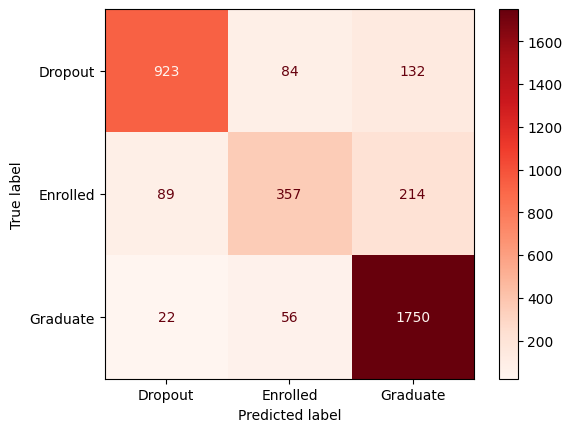

In [189]:
 # Cek performa model

print('Recall score - Train Set  : ', recall_score(y_train, y_pred_train, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pilih_model, X_train_capped, y_train, cmap='Reds'))

# 9. Hyperparameter Tuning

In [190]:
# Hyperparameter Tuning : Manual Search

%%time

rf_ms_1 = Pipeline([
    ('preprocess', preprocessor),
    ('clf', GradientBoostingClassifier(n_estimators=300,
                                       min_samples_leaf=10,
                                       random_state=10))
])
rf_ms_1.fit(X_train_capped, y_train)

CPU times: user 7.75 s, sys: 3.95 ms, total: 7.75 s
Wall time: 7.75 s


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['application_order', 'age',
                                                   'sem1_credited',
                                                   'sem1_enrolled', 'sem1_eval',
                                                   'sem1_approved',
                                                   'sem1_grade', 'sem1_wo_eval',
                                                   'sem2_credited',
                                                   'sem2_enrolled', 'sem2_eval',
                                                   'sem2_approved',
                                                   'sem2_grade', 'sem2_wo_eval',
                                                   'unemployment_rate',
                                                   'gdp']),...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital_status', 'daytime',
                                                   'displaced', 'debtor',
                                                   'tuition_fee', 'gender',
                                                   'scholarship',
                                                   'app_mode_ringkas',
                                                   'course_ringkas',
                                                   'prev_qualification_ringkas',
                                                   'mother_qualification_ringkas',
                                                   'father_qualification_ringkas',
                                                   'mother_occupation_ringkas'])])),
                ('clf',
                 GradientBoostingClassifier(min_samples_leaf=10,
                                            n_estimators=300,
                                            random_state=10))])

Recall score - Train Set  :  0.8525683453531983 

Classification Report : 
               precision    recall  f1-score   support

     Dropout       0.94      0.87      0.91      1139
    Enrolled       0.84      0.71      0.77       660
    Graduate       0.89      0.97      0.93      1828

    accuracy                           0.89      3627
   macro avg       0.89      0.85      0.87      3627
weighted avg       0.89      0.89      0.89      3627
 

Confusion Matrix      : 


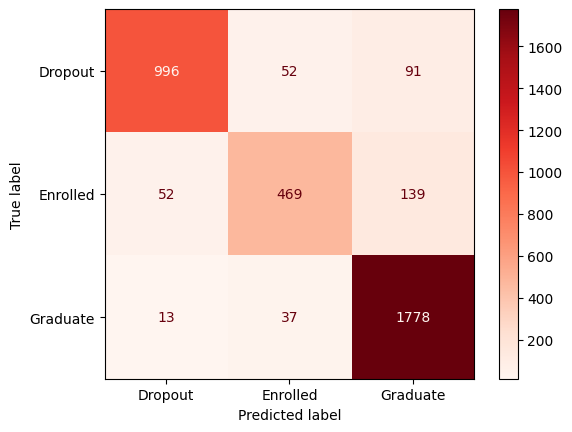

In [191]:
 # Cek performa model

y_pred_train = rf_ms_1.predict(X_train_capped)

print('Recall score - Train Set  : ', recall_score(y_train, y_pred_train, average='macro'), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_ms_1, X_train_capped, y_train, cmap='Reds'))

# 8. Model Evaluation

Karena pihak universitas ingin mengurangi mahasiswa yang dropout, maka model akan dilihat dari nilai recallnya. Berdasarkan nilai recall tanpa hyperparameter tuning dan dengan hyperparameter tuning, diketahui bahwa nilai recall dengan hyperparameter tuning lebih baik. Oleh karena itu, model dengan hyperparameter tuning akan disimpan.

# 9. Model Saving

In [192]:
num_columns_list = num_columns.columns.tolist()
cat_columns_list = cat_columns.columns.tolist()

In [193]:
# Model saving

with open ('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns_list, file_1)

with open ('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns_list, file_2)

with open ('rf_ms_1.pkl', 'wb') as file_3:
  pickle.dump(rf_ms_1, file_3)